# Inaugural Project 





For this inaugural project, we will be working with a benchmark model of insurance policies, namely the Mossin's Model. 

The agent holds assets $y$, and and may suffer a monetary loss $x$. The loss incurs with probability $p$, and utility of the agents is given by $u(\cdot)$. 

The agents expected value while not insured is given by $$V_0=pu(y-x)+(1-p)u(y),$$

An insurance company offers insurance coverage $q$ at a premium $\pi$. The covered amount can not exceed the monetary loss, thus $q\in [0,x]$. 

Insurance companys premium is $$\pi(p,q)=pq,$$

The agents expected value while insured is given by $$V(q;\pi)= pu (y-x + q - \pi(p,q)) + (1-p)u(y - \pi(p,q)), $$

Utility of the agent is given by $$u(z)=\frac{z^{1+\vartheta}}{1+\vartheta}$$


We have the following parameters given:
$$y=1, p=0.2, \vartheta=-2$$


Initially, we import the packages and functions required for the analysis. 

In [1]:
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import inauguralproject as ip

## Question 1

$i)$
In this question we are to construct a function that takes $(x, y, p)$ as arguments and returns the agents optimal insurance coverage $q^*$.

First we define the function for the agents Utility and expected value. 

In [24]:
def utility(z, theta):
    u = (z**(1+theta))/(1+theta)
    return u

def exp_utility(q, x, y, p):
    V = p*utility(y-x+(1-p)*q, theta) + (1-p)*utility(y-p*q, theta)
    return V


<class 'float'>


Next we define the parameters as given in the problem. We define the function $q\_optimize$, using the Lambda syntax to evaluate the expression for $q$. From the Scipy package we use the optimize.mimimize_scalar, which will maximize the objective within the given bounds. Since this maximizes, and we are trying to minimize the function, the utility function is negated in the Lambda syntax. The bounds are set between 0 and 1, since the agents assets are $y=1$, and the loss can not be greater than the current endowment, and therefore the coverage can not exceed this either. 

In [3]:
y = 1
p = 0.2
theta = -2

def q_optimize(x, y, p):
    obj = lambda q: -exp_utility(q, x, y, p)
    res = optimize.minimize_scalar(obj, bounds=(0, 1), method='bounded')
    return res.x


$ii)$ \& $iii)$
In these subquestions, we are to create a grid of x, in the range $[0.01, 0.9]$. For that we use the $linspace$ function from $numpy$, which creates 100 random observations between the two given values. We likewise create a grid of 100 observations for $q^*$, which only consists of zeros. This grid will be used to plug in the results from the $q\_optimize$ function defined above, which is done in the enumerate function below.  

In [4]:
# grid for xs
xs = np.linspace(0.01, 0.9, 100)

# grid for qstar
qstar = np.zeros(100)

# loop
for i, x in enumerate(xs):
    qstar[i] = q_optimize(x, y, p)

$iiii)$ For the plot, we have the monetary loss $x$, on the x-axis, and the coverage amount $q$, on the y-axis. The plot shows a perfect $45^{\circ}$ line between the two axis, suggesting that the optimal coverage for the agent should equal his monetary loss.

Text(0.5, 1.0, 'Optimal insurance coverage, $q^*$')

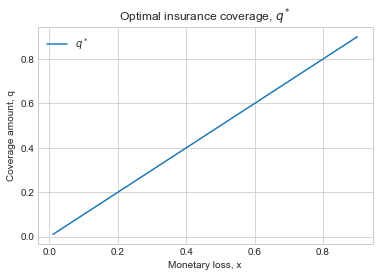

In [5]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(xs, qstar,'-', label='$q^*$')
ax.legend(loc='upper left')
ax.set_xlabel('Monetary loss, x')
ax.set_ylabel('Coverage amount, q')
ax.set_title('Optimal insurance coverage, $q^*$')


## Question 2

For this section, we are to find the acceptable contracts from the POV of the agent. For this, we make a function to calculate which values of the insurance premium $\pi$ will make the agent indifferent. 

To start off with, we define the x given in the problem, and then create a grid for the insurance coverage in the same fashion as in the previous question. 

Furthermore, we define the expected values anew, one for the insured case and one for the uninsured case, in order to find for which $\pi$'s the difference is zero. 

In [25]:
x = 0.6

# grid for qs between 0.01 and 0.6
qs = np.linspace(0.01, 0.6, 100)

def V_pi(pi, q, x, y, p):
    return p*utility(y-x+q-pi, theta) + (1-p)*utility(y-pi, theta)

V0 = V_pi(0, 0, x, y, p)


<class 'float'>


$ii)$ We define a function for the optimal insurance premia, for which the objective function is the diff, evaluated for $\pi$. We use the $optimize.root$ function from $numpy$, which will return the values of $\pi$, for which the difference between $V_\pi$ and $V_0$ is zero - and thereby, the agent is indifferent. 

Next, we create an empty grid with 100 observations, to input the results from the optimal $\pi$. We need the insurance companys insurance premia, which will make the company break even, which is defined as the variable $pi\_norm$

In [7]:
def optimal_pi(q, x, y, p, V0):
    # objective function
    def obj(pi):
        return V_pi(pi, q, x, y, p) - V0
    # optimize
    res = optimize.root(obj, 0.1)
    return res.x



# grid for pi calculations
pis = np.zeros(100)
pi_norm = p*qs
# loop
for i, q in enumerate(qs):
    pis[i] = optimal_pi(q, x, y, p, V0)
    

Next we plot the results.

Text(0.5, 1.0, 'Set of feasible premia for a given $q$')

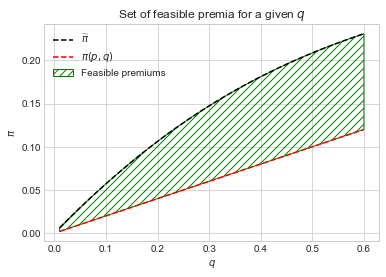

In [8]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(qs, pis,'--', color='black', label='$\widetilde{\pi}$')
ax.plot(qs, pi_norm, '--', color='red', label='$\pi (p,q)$')
ax.fill_between(qs, pis, pi_norm, color='none', hatch='///', edgecolor='g', label='Feasible premiums')
ax.legend(loc='upper left')
ax.set_xlabel('$q$')
ax.set_ylabel('$\pi$')
ax.set_title('Set of feasible premia for a given $q$')

The graph is created using the $matplotlib$ package. The calculated $\widetilde{\pi}$'s are presented on the black graph, and the $"break-even"$ $\pi$'s are the red graph. Since we are interested in all the feasible premia, ie. the premia where the agent is either indifferent, or better off, by having insurance, and where the company is at least covering the costs. This leaves us with all the area below the black dotted line and above the red dotted line. 

This area of feasible premia is thus represented with the green lines. 

## Question 3

We now consider a modified setup, with the monetary loss $x$ drawn from a beta distribution, and the coverage $q$ being a fraction of this loss. 
$$q=\gamma x, \quad \gamma \in [0,1]$$

$$x\sim Beta(\alpha,\beta), \quad \alpha=2, \beta=7$$

Thus, the agents value is 
$$V(\gamma, \pi)=\int_{0}^{1}u(y-(1-\gamma)x-\pi)f(x)dx$$

We are to construct a function that computes $V(\gamma, \pi)$ by Monte Carlo integration using at least 10.000 draws. 

First, we define the arguments that are given.

In [9]:
alpha = 2
beta = 7
N = 10000

Next, we define the function for altered value. 

In [10]:
def g(x, y, gamma, pi):
    return utility(y-(1-gamma)*x-pi, theta)

To define the function, we make use of the function $random.beta$ from the numpy package, which draws $N$ number of draws from the beta distribution determined by the given $\alpha$ and $\beta$.  

Since we have 10.000 draws, the law of large numbers ensures that the mean value of the value function equals the integral. Therefore, we need only take the mean value instead of calculating the integral.

In [11]:
def monte_carlo(y, p, gamma, pi, N):
    np.random.seed(123)
    # Draws of X
    xlist = np.random.beta(alpha, beta, N)
    return np.mean(g(xlist, y, gamma, pi))

We are calculating the value for the agent for $\gamma =0.9, \pi = 0.2$ and for $\gamma =0.45, \pi =0.1$ ie. coverage of 90% of the loss, with a given insurance premium, versus coverage of 45% of the loss, with half the insurance premium. We are to find out which insurance policy is most preferable for the agent, judged by his expected value. 

In [12]:
# gamma = 0.9, pi = 0.2
print(monte_carlo(y, p, 0.9, 0.2, N))

-1.2858562100115782


In [13]:
# gamma = 0.45, pi = 0.1
print(monte_carlo(y, p, 0.45, 0.1, N))

-1.2965582462632568


As it can be seen above, for the bigger and more expensive insurance policy, the expected value is $-1.285$.
The expected value for the lesser and cheaper insurance policy is $-1.296$, meaning that the insurance policy covering 90% of the loss is of the highest expected value, and therefore is the most preferable insurance policy for the agent.

## Question 4

In this question, we are to find the optimal insurance premium given the agents request of a 95% coverage. This problem is very similar to the second question, and will thus be solved similarly.

We have the monte carlo simulation from question 3, which we then apply the $optimize.root$ function to, with the object being $\pi$. This will calculate the values of $\pi$ resulting in the difference between the expected value estimated by the Monte Carlo, and the expected value not having insurance, being zero. 

Next, we print the optimal $\pi$ for the 95% coverage insurance policy requested by the agent.

In [14]:
pi = 0.1
def optimal_pi2(y, p, gamma, pi, N, V0):
    def obj(pi): 
        return monte_carlo(y, p, gamma, pi, N) - V0
    # Optimize
    res = optimize.root(obj, 0.1, method="broyden1")
    return res.x

print(optimal_pi2(y, p, 0.95, pi, N, V0))

0.21967064885141938


From the result above, the optimal insurance policy premium is $\pi^*=0.22$ for the coverage requested by the agent. 

This is not the best value for the agent though. As seen below, the value is less than that of a coverage of 90% and a premium at 0.2. 

In [15]:
print(monte_carlo(y, p, 0.95, 0.21967064885141938, N))

-1.3000003648854108
